## Final Project Submission

Please fill out:
* Student name: Kevin Evans & Jonathan Vasquez
* Student pace: Full Time
* Scheduled project review date/time: 07/10/2020
* Instructor name: Sean Wilson
* Blog post URL:


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3 
import matplotlib.pyplot as plt
import itertools
import warnings
import scipy.stats as stats


from pandas import set_option
plt.style.use('ggplot')
pd.set_option('display.max_columns', 1000)
%matplotlib inline 
import warnings; warnings.simplefilter('ignore')

from imblearn.over_sampling import SMOTE
from collections import Counter
from imblearn.under_sampling import TomekLinks
from IPython.display import Image  
import pydotplus

from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.metrics import make_scorer, accuracy_score 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz

from sklearn.externals.six import StringIO  

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV  
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 

from scipy.stats import randint

from sklearn.linear_model import LogisticRegression 

from sklearn.feature_selection import RFE

from sklearn.pipeline import Pipeline 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.feature_selection import SelectFromModel

from sklearn.utils import resample

from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

Data info is here:
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29#

#### Drug Usuage Identifier
* CL0 Never Used
* CL1 Used over a Decade Ago  
* CL2 Used in Last Decade 
* CL3 Used in Last Year  
* CL4 Used in Last Month  
* CL5 Used in Last Week 
* CL6 Used in Last Day

#### Drug Definition

* Amyl Nitrite (AKA Poppers, similar to acid (LSD) and ecstasy)
* Legal High (AKA Bath Salts,avaliable to buy OTC)
* VSA (Volatile Substance Abuse, glue/marker sniffers)

# Importing/Inspecting Data

In [2]:
df = pd.read_csv('drug_consumption.csv', index_col=0) #ID as index
df

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-0.95197,0.48246,-0.61113,-0.57009,-0.31685,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5
1885,-0.95197,-0.48246,-0.61113,-0.57009,-0.31685,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0
1886,-0.07854,0.48246,0.45468,-0.57009,-0.31685,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0


In [3]:
df.columns

Index(['Age', 'Gender', 'Education', 'Country', 'Ethnicity', 'Nscore',
       'Escore', 'Oscore', 'Ascore', 'Cscore', 'Impulsive', 'SS', 'Alcohol',
       'Amphet', 'Amyl', 'Benzos', 'Caff', 'Cannabis', 'Choc', 'Coke', 'Crack',
       'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms',
       'Nicotine', 'Semer', 'VSA'],
      dtype='object')

# Data Cleaning/Feature Engineering

In [4]:
df.isnull().any() #No Missing Values

Age          False
Gender       False
Education    False
Country      False
Ethnicity    False
Nscore       False
Escore       False
Oscore       False
Ascore       False
Cscore       False
Impulsive    False
SS           False
Alcohol      False
Amphet       False
Amyl         False
Benzos       False
Caff         False
Cannabis     False
Choc         False
Coke         False
Crack        False
Ecstasy      False
Heroin       False
Ketamine     False
Legalh       False
LSD          False
Meth         False
Mushrooms    False
Nicotine     False
Semer        False
VSA          False
dtype: bool

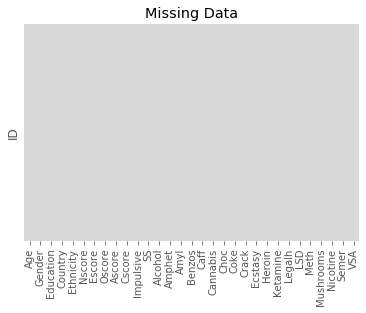

In [5]:
#Visual Showing No Missing Values
sns.heatmap(df.isnull(),yticklabels = False, cbar = False,cmap = 'tab20c_r')
plt.title('Missing Data')
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1885 entries, 1 to 1888
Data columns (total 31 columns):
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null object
LSD          1885 non-null obje

Updating categorical data for drug use to be binary: 
* 0 = Non-User, 1 = User

In [7]:
df.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


## Create Target

In [8]:
conditions = [(df['Crack'].isin(['CL2','CL3','CL4','CL5','CL6'])), 
              (df['Heroin'].isin(['CL2','CL3','CL4','CL5','CL6'])), 
              (df['Coke'].isin(['CL2','CL3','CL4','CL5','CL6'])),
              (df['Meth'].isin(['CL2','CL3','CL4','CL5','CL6']))]
options = [1,1,1,1]

In [9]:
df['Hard_Drug_User'] = np.select(conditions, options, 0) #Make Hard_Drug_User column

In [10]:
df['Hard_Drug_User'].value_counts()

0    1053
1     832
Name: Hard_Drug_User, dtype: int64

## Age

In [11]:
df['Age'] = df['Age'].astype(str)

In [12]:
conditions = [(df['Age'] == '-0.9519700000000001'), (df['Age'] == '-0.07854'),
             (df['Age'] == '0.49788000000000004'), (df['Age'] == '1.09449'),
             (df['Age'] == '1.82213'), (df['Age'] == '2.59171')]
choices = ['18-24', '25-35', '35-44', '45-54', '55-64', '65+']

In [13]:
df['Age'] = np.select(conditions, choices, df['Age'])

In [14]:
df['Age'].value_counts()

18-24    643
25-35    481
35-44    356
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

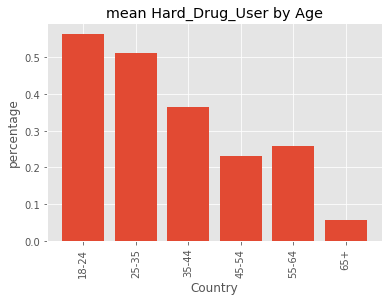

In [15]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Age')['Hard_Drug_User'].mean().index, df.groupby('Age')['Hard_Drug_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('Country')
ax.set_title('mean Hard_Drug_User by Age')
plt.xticks(rotation=90)
plt.show()

In [16]:
mc = MultiComparison(df['Hard_Drug_User'], df['Age'])
mc_results = mc.tukeyhsd()
print(mc_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
 18-24  25-35  -0.0531 0.4436 -0.1355  0.0293  False
 18-24  35-44  -0.1994  0.001 -0.2897  -0.109   True
 18-24  45-54  -0.3332  0.001 -0.4295  -0.237   True
 18-24  55-64  -0.3065  0.001 -0.4582 -0.1548   True
 18-24    65+   -0.509  0.001 -0.8358 -0.1822   True
 25-35  35-44  -0.1463  0.001 -0.2419 -0.0507   True
 25-35  45-54  -0.2801  0.001 -0.3814 -0.1789   True
 25-35  55-64  -0.2534  0.001 -0.4083 -0.0985   True
 25-35    65+  -0.4559 0.0011 -0.7842 -0.1276   True
 35-44  45-54  -0.1339 0.0054 -0.2416 -0.0261   True
 35-44  55-64  -0.1071 0.3925 -0.2664  0.0521  False
 35-44    65+  -0.3096 0.0813   -0.64  0.0208  False
 45-54  55-64   0.0268    0.9 -0.1359  0.1895  False
 45-54    65+  -0.1757  0.637 -0.5078  0.1563  False
 55-64    65+  -0.2025 0.5616 -0.5546  0.1496  False
----------------------------------------------

### Make age is less than 35 group

In [17]:
df['less_than_35'] = np.where(((df['Age'] == '18-24') | (df['Age'] == '25-35')), 1, 0)

# EDA

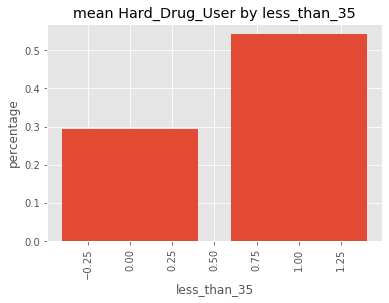

In [18]:
fig, ax = plt.subplots()
ax.bar(df.groupby('less_than_35')['Hard_Drug_User'].mean().index, df.groupby('less_than_35')['Hard_Drug_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('less_than_35')
ax.set_title('mean Hard_Drug_User by less_than_35')
plt.xticks(rotation=90)
plt.show()

In [19]:
not_less_than_35 = df.loc[df['less_than_35'] == 0]

In [20]:
less_than_35 = df.loc[df['less_than_35'] == 1]

In [21]:
stats.ttest_ind(less_than_35['Hard_Drug_User'], not_less_than_35['Hard_Drug_User'], equal_var=False)

Ttest_indResult(statistic=11.197113737733773, pvalue=3.8344130363351063e-28)

## Gender

In [22]:
df['Gender'] = df['Gender'].astype(str)

In [23]:
conditions = [(df['Gender'] == '0.48246000000000006'), (df['Gender'] == '-0.48246000000000006'),
             ]
choices = ['Female', 'Male']

In [24]:
df['Gender'] = np.select(conditions, choices, df['Gender'])

In [25]:
df['Gender'].value_counts()

Male      943
Female    942
Name: Gender, dtype: int64

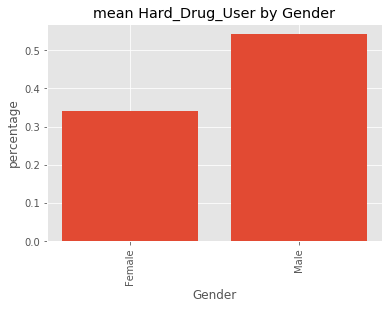

In [26]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Gender')['Hard_Drug_User'].mean().index, df.groupby('Gender')['Hard_Drug_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('Gender')
ax.set_title('mean Hard_Drug_User by Gender')
plt.xticks(rotation=90)
plt.show()

In [27]:
stats.ttest_ind(df[df['Gender']=='Male']['Hard_Drug_User'], df[df['Gender']=='Female']['Hard_Drug_User'], equal_var=False)

Ttest_indResult(statistic=8.974253968326266, pvalue=6.742780000791603e-19)

## Education

In [28]:
df['Education'] = df['Education'].astype(str)

In [29]:
conditions = [(df['Education'] == '-0.6111300000000001'), (df['Education'] == '0.45468000000000003'),
             (df['Education'] == '1.16365'), (df['Education'] == '-0.059210000000000006'),
             (df['Education'] == '-1.22751'), (df['Education'] == '-1.7379'),
             (df['Education'] == '1.98437'), (df['Education'] == '-1.43719'), 
              (df['Education'] == '-2.43591')]
choices = ['Some college or university', 'University degree', 
           'Masters Degree', 'Professional certificate or diploma', 'Left school at 18 years', 
           'Left school at 16 years', 'Doctorate degree', 'Left school at 17 years',
           'Left school before 16 years']

In [30]:
df['Education'] = np.select(conditions, choices, df['Education'])

In [31]:
df['Education'].value_counts()

Some college or university             506
University degree                      480
Masters Degree                         283
Professional certificate or diploma    270
Left school at 18 years                100
Left school at 16 years                 99
Doctorate degree                        89
Left school at 17 years                 30
Left school before 16 years             28
Name: Education, dtype: int64

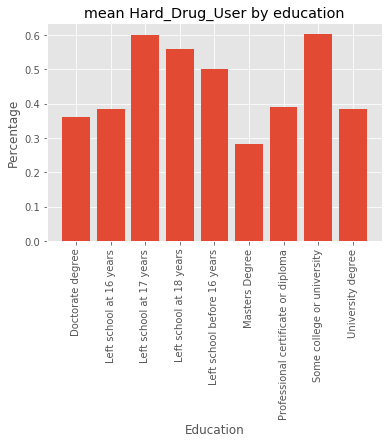

In [32]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Education')['Hard_Drug_User'].mean().index, df.groupby('Education')['Hard_Drug_User'].mean().values)
ax.set_ylabel('Percentage')
ax.set_xlabel('Education')
ax.set_title('mean Hard_Drug_User by education')
plt.xticks(rotation=90)
plt.show()

# @HOW CAN WE USE <em>SOME COLLEGE</em> WHEN IT'S NOT SIGNIFICANTLY DIFFERENT FOR ALL GROUP BUT IS FOR MOST????

In [33]:
mc = MultiComparison(df['Hard_Drug_User'], df['Education'])
mc_results = mc.tukeyhsd()
print(mc_results)

                             Multiple Comparison of Means - Tukey HSD, FWER=0.05                              
               group1                              group2               meandiff p-adj   lower   upper  reject
--------------------------------------------------------------------------------------------------------------
                   Doctorate degree             Left school at 16 years   0.0243    0.9 -0.1951  0.2437  False
                   Doctorate degree             Left school at 17 years   0.2404 0.3101 -0.0767  0.5576  False
                   Doctorate degree             Left school at 18 years   0.2004 0.1036 -0.0184  0.4193  False
                   Doctorate degree         Left school before 16 years   0.1404    0.9  -0.185  0.4659  False
                   Doctorate degree                      Masters Degree  -0.0769    0.9 -0.2594  0.1057  False
                   Doctorate degree Professional certificate or diploma   0.0293    0.9 -0.1543  0.2129  False
 

## Country

In [34]:
df['Country'] = df['Country'].astype(str)

In [35]:
conditions = [(df['Country'] == '0.9608200000000001'), (df['Country'] == '-0.57009'),
             (df['Country'] == '-0.28519'), (df['Country'] == '0.24923'),
             (df['Country'] == '-0.09765'), (df['Country'] == '0.21128000000000002'),
             (df['Country'] == '-0.46841000000000005')]
choices = ['UK', 'USA', 'Other', 'Canada', 'Australia', 'Republic of Ireland', 'New Zealand']

In [36]:
df['Country'] = np.select(conditions, choices, df['Country'])

In [37]:
df['Country'].value_counts()

UK                     1044
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

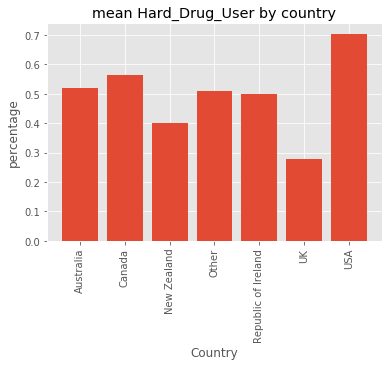

In [38]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Country')['Hard_Drug_User'].mean().index, df.groupby('Country')['Hard_Drug_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('Country')
ax.set_title('mean Hard_Drug_User by country')
plt.xticks(rotation=90)
plt.show()

In [39]:
mc = MultiComparison(df['Hard_Drug_User'], df['Country'])
mc_results = mc.tukeyhsd()
print(mc_results)

             Multiple Comparison of Means - Tukey HSD, FWER=0.05              
       group1              group2       meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------
          Australia              Canada   0.0447    0.9 -0.1903  0.2797  False
          Australia         New Zealand  -0.1185    0.9 -0.7525  0.5155  False
          Australia               Other    -0.01    0.9 -0.2329  0.2128  False
          Australia Republic of Ireland  -0.0185    0.9 -0.3735  0.3365  False
          Australia                  UK  -0.2398 0.0036 -0.4291 -0.0505   True
          Australia                 USA   0.1853 0.0707 -0.0081  0.3786  False
             Canada         New Zealand  -0.1632    0.9  -0.787  0.4605  False
             Canada               Other  -0.0547    0.9 -0.2464  0.1369  False
             Canada Republic of Ireland  -0.0632    0.9 -0.3996  0.2731  False
             Canada                  UK  -0.2845  0.

# @SHOULD WE CONSIDER UPSAMPLING OR SOMETHING TO GET THESE TO BE BALANCE?????

In [40]:
df.loc[df['Hard_Drug_User'] == 1].groupby('Country').count()

,Age,Gender,Education,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Hard_Drug_User,less_than_35
Country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Australia,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28,28
Canada,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49,49
New Zealand,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Other,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60,60
Republic of Ireland,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
UK,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291,291
USA,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392,392


## Ethnicity

In [41]:
df['Ethnicity'] = df['Ethnicity'].astype(str)

In [42]:
conditions = [(df['Ethnicity'] == '-0.31685'), (df['Ethnicity'] == '0.1144'),
             (df['Ethnicity'] == '-1.1070200000000001'), (df['Ethnicity'] == '-0.50212'),
             (df['Ethnicity'] == '-0.22166'), (df['Ethnicity'] == '0.126'),
             (df['Ethnicity'] == '1.90725')]
choices = ['White', 'Other', 'Black', 'Asian', 'Mixed-White/Black', 'Mixed-White/Asian', 
           'Mixed-Black/Asian']

In [43]:
df['Ethnicity'] = np.select(conditions, choices, df['Ethnicity'])

In [44]:
df['Ethnicity'].value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Asian      20
Mixed-White/Black      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

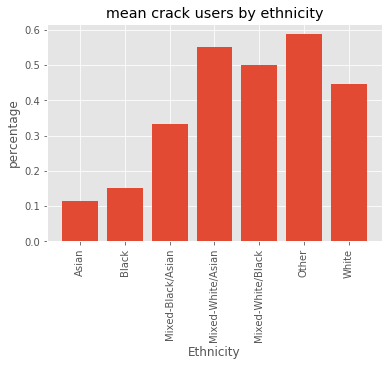

In [45]:
fig, ax = plt.subplots()
ax.bar(df.groupby('Ethnicity')['Hard_Drug_User'].mean().index, df.groupby('Ethnicity')['Hard_Drug_User'].mean().values)
ax.set_ylabel('percentage')
ax.set_xlabel('Ethnicity')
ax.set_title('mean crack users by ethnicity')
plt.xticks(rotation=90)
plt.show()

In [46]:
mc = MultiComparison(df['Hard_Drug_User'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
            Asian             Black   0.0361    0.9 -0.3459 0.4182  False
            Asian Mixed-Black/Asian   0.2179    0.9 -0.6703 1.1062  False
            Asian Mixed-White/Asian   0.4346 0.0487  0.0013 0.8679   True
            Asian Mixed-White/Black   0.3846 0.1208 -0.0487 0.8179  False
            Asian             Other   0.4719  0.001  0.1323 0.8115   True
            Asian             White   0.3294 0.0132  0.0415 0.6172   True
            Black Mixed-Black/Asian   0.1818    0.9 -0.6967 1.0603  False
            Black Mixed-White/Asian   0.3985 0.0668 -0.0143 0.8113  False
            Black Mixed-White/Black   0.3485 0.1629 -0.0643 0.7613  False
            Black             Other   0.4358  0.001  0.1227 0.7488   True
            Black             White   

In [47]:
features_columns = df.drop(columns='Hard_Drug_User').columns

In [48]:
#Distribute columns into groups of 4 per row
n = 4
row_groups = [features_columns[i:i+n] for i in range(0, len(features_columns), n)]

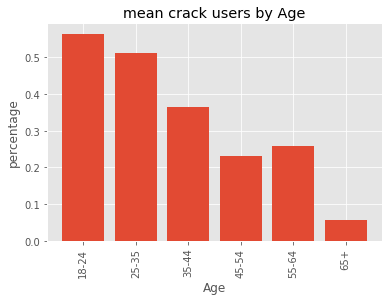

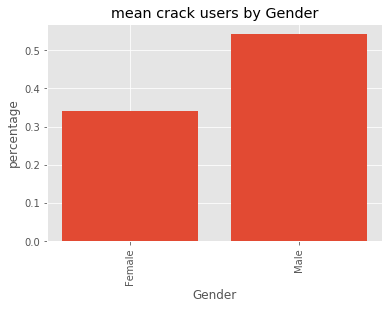

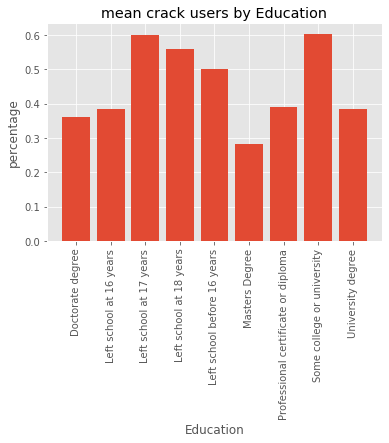

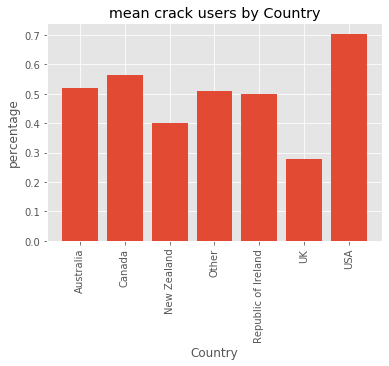

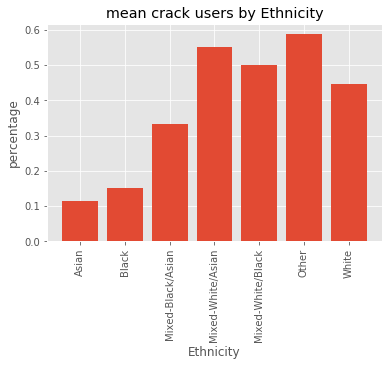

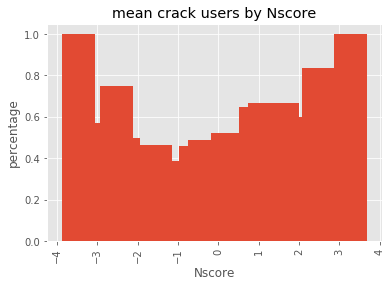

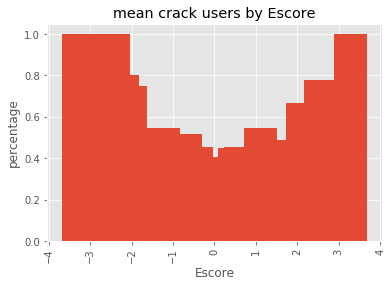

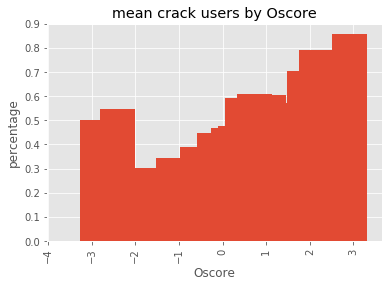

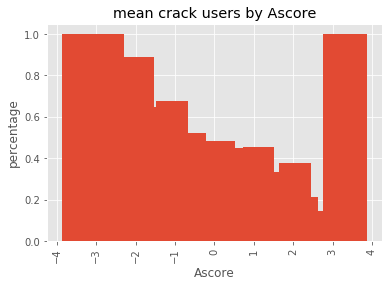

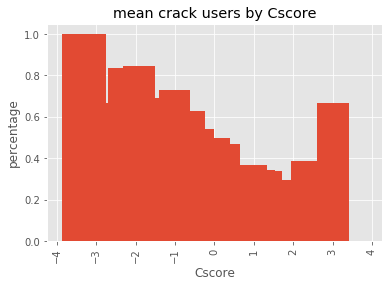

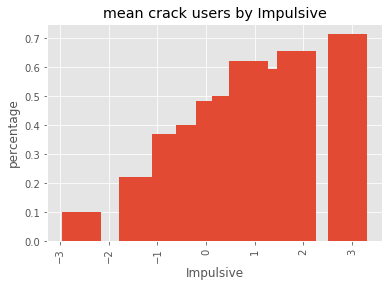

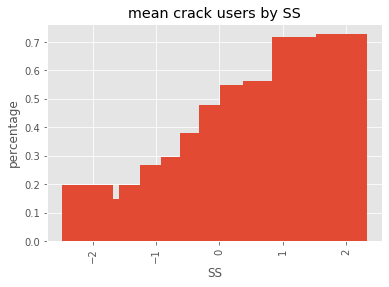

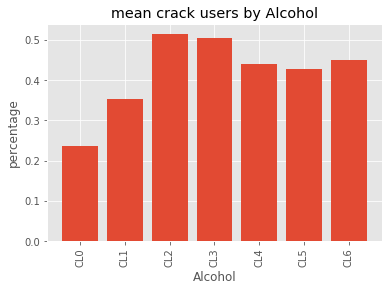

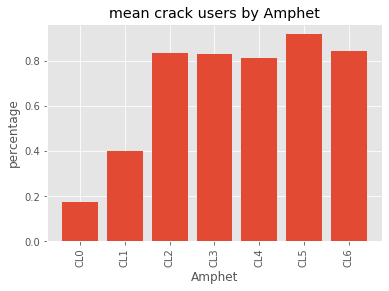

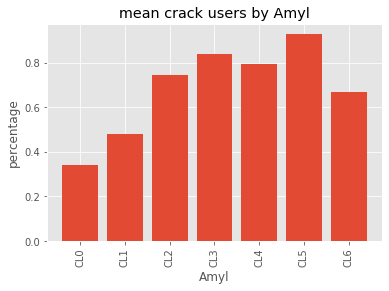

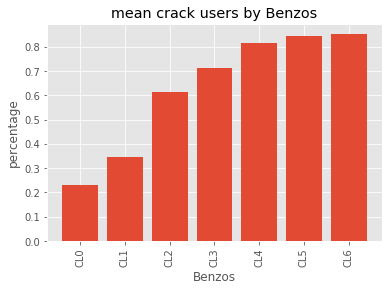

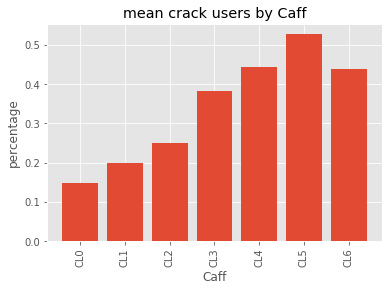

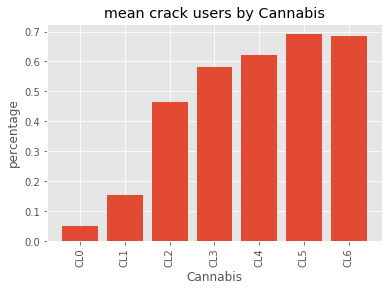

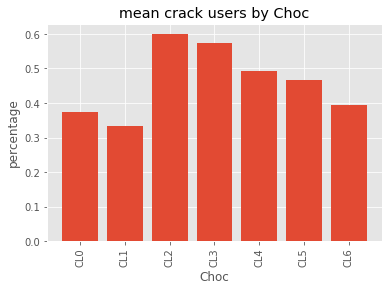

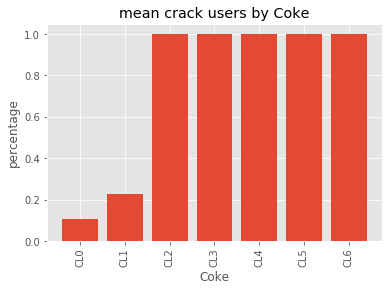

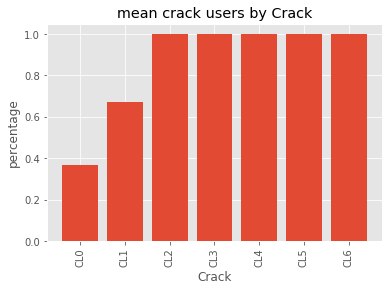

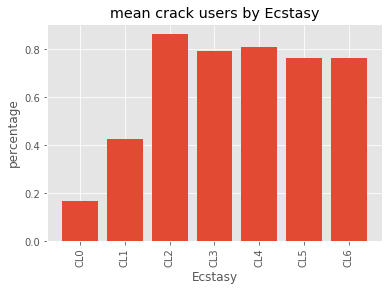

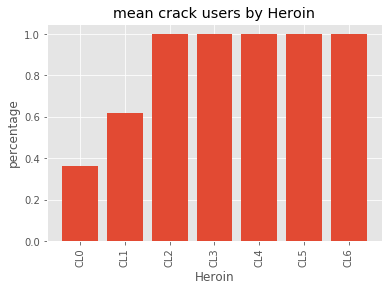

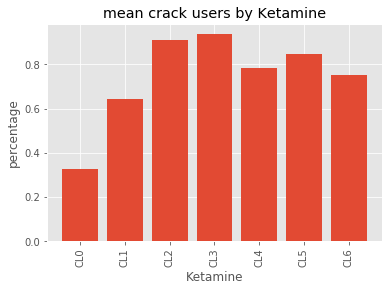

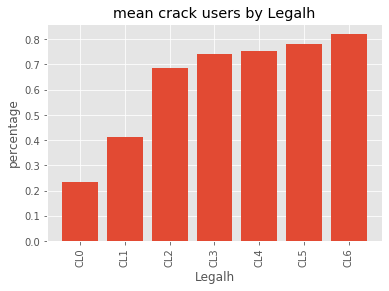

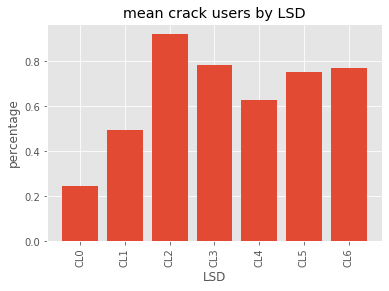

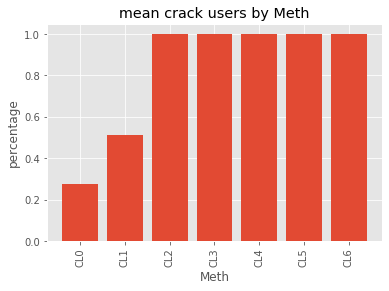

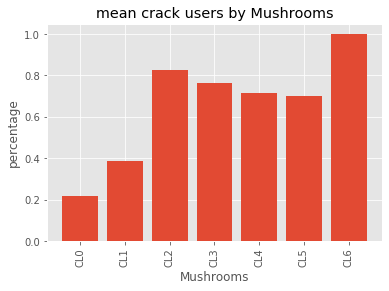

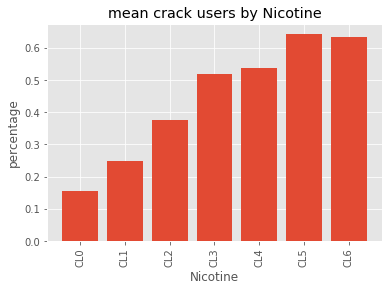

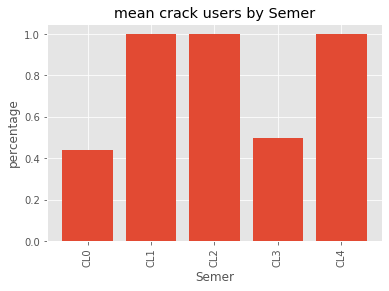

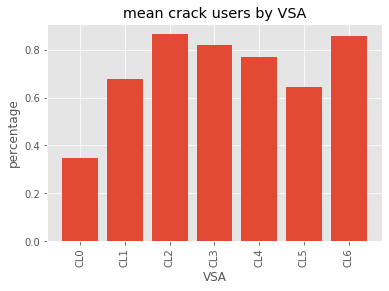

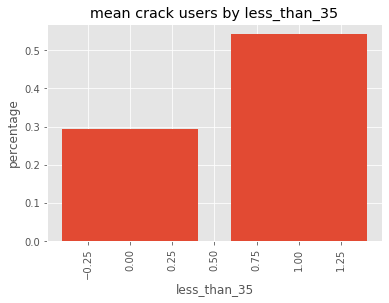

In [49]:
for i in row_groups:
    for group in i:
        fig, ax = plt.subplots()
        ax.bar(df.groupby(group)['Hard_Drug_User'].mean().index, df.groupby(group)['Hard_Drug_User'].mean().values)
        ax.set_ylabel('percentage')
        ax.set_xlabel(group)
        ax.set_title('mean crack users by '+group)
        plt.xticks(rotation=90)
        plt.show()

In [50]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [51]:
mc = MultiComparison(df['Hard_Drug_User'], df['Ethnicity'])
mc_results = mc.tukeyhsd()
print(mc_results)

           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
      group1            group2      meandiff p-adj   lower  upper  reject
-------------------------------------------------------------------------
            Asian             Black   0.0361    0.9 -0.3459 0.4182  False
            Asian Mixed-Black/Asian   0.2179    0.9 -0.6703 1.1062  False
            Asian Mixed-White/Asian   0.4346 0.0487  0.0013 0.8679   True
            Asian Mixed-White/Black   0.3846 0.1208 -0.0487 0.8179  False
            Asian             Other   0.4719  0.001  0.1323 0.8115   True
            Asian             White   0.3294 0.0132  0.0415 0.6172   True
            Black Mixed-Black/Asian   0.1818    0.9 -0.6967 1.0603  False
            Black Mixed-White/Asian   0.3985 0.0668 -0.0143 0.8113  False
            Black Mixed-White/Black   0.3485 0.1629 -0.0643 0.7613  False
            Black             Other   0.4358  0.001  0.1227 0.7488   True
            Black             White   

In [52]:
#dontmakedummies()

In [53]:
dummies = ['Education', 'Age', 'Gender', 'Country', 'Ethnicity']

In [54]:
df = pd.get_dummies(data=df, columns=dummies, drop_first=True) 

In [55]:
df

,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,Hard_Drug_User,less_than_35,Education_Left school at 16 years,Education_Left school at 17 years,Education_Left school at 18 years,Education_Left school before 16 years,Education_Masters Degree,Education_Professional certificate or diploma,Education_Some college or university,Education_University degree,Age_25-35,Age_35-44,Age_45-54,Age_55-64,Age_65+,Gender_Male,Country_Canada,Country_New Zealand,Country_Other,Country_Republic of Ireland,Country_UK,Country_USA,Ethnicity_Black,Ethnicity_Mixed-Black/Asian,Ethnicity_Mixed-White/Asian,Ethnicity_Mixed-White/Black,Ethnicity_Other,Ethnicity_White
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
3,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
4,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
5,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1884,-1.19430,1.74091,1.88511,0.76096,-1.13788,0.88113,1.92173,CL5,CL0,CL0,CL0,CL4,CL5,CL4,CL0,CL0,CL0,CL0,CL0,CL3,CL3,CL0,CL0,CL0,CL0,CL5,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1885,-0.24649,1.74091,0.58331,0.76096,-1.51840,0.88113,0.76540,CL5,CL0,CL0,CL0,CL5,CL3,CL4,CL0,CL0,CL2,CL0,CL0,CL3,CL5,CL4,CL4,CL5,CL0,CL0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1886,1.13281,-1.37639,-1.27553,-1.77200,-1.38502,0.52975,-0.52593,CL4,CL6,CL5,CL5,CL6,CL6,CL6,CL4,CL0,CL4,CL0,CL2,CL0,CL2,CL0,CL2,CL6,CL0,CL0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


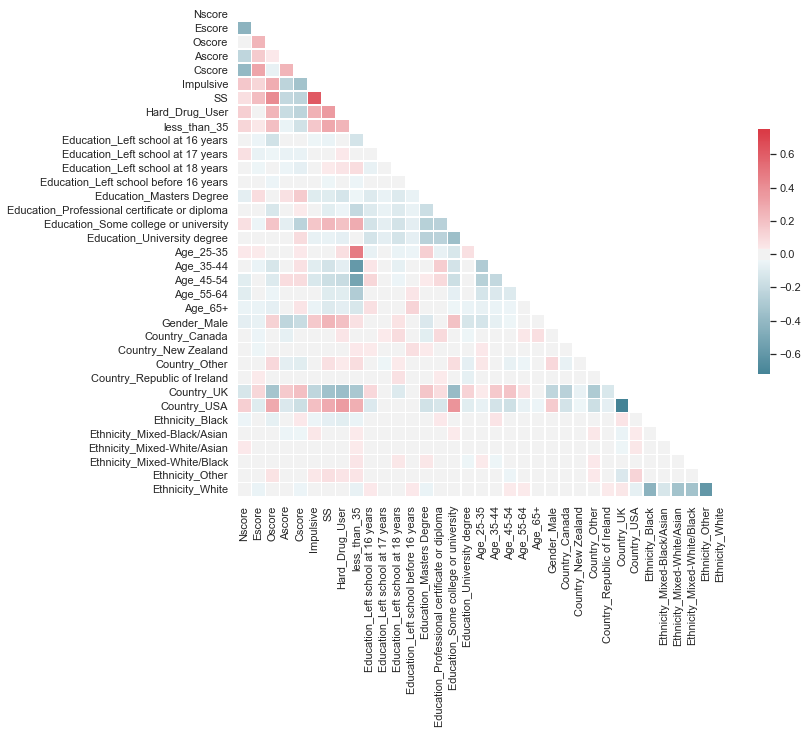

In [56]:
#Heatmap to Visualize Correlations
sns.set(style="white")
corr = df.corr() 
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

## Confusion Matrix

In [57]:
def plot_confusion_matrix(cm, classes=['Not_Hard_Drug_User', 'Hard_Drug_User'],
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Train Test Split

In [58]:
target = df['Hard_Drug_User']
features = df.select_dtypes(include=['number']).drop(columns='Hard_Drug_User')

In [59]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=.2, random_state=42)

In [60]:
scaler= MinMaxScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(data = scaler.transform(X_train), columns = features.columns)
X_test = pd.DataFrame(data = scaler.transform(X_test), columns = features.columns)

### Logistic Regression

In [61]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)
logreg_f1 = metrics.f1_score(y_test, logreg_preds)
logreg_acc = metrics.accuracy_score(y_test, logreg_preds)
print('Test F1:' , logreg_f1)
print('Test Accuracy:' , logreg_acc)

Test F1: 0.7023809523809524
Test Accuracy: 0.7347480106100795


Confusion Matrix, without normalization
[[159  63]
 [ 37 118]]


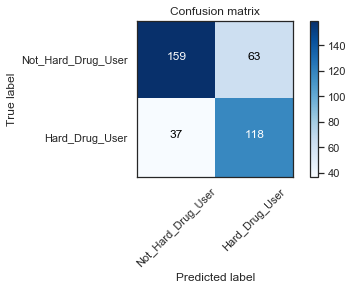

In [62]:
cm_lr=metrics.confusion_matrix(y_test, logreg_preds)
plot_confusion_matrix(cm_lr)

### KNN

In [63]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
knn_f1 = metrics.f1_score(y_test, y_pred_knn)
knn_acc = metrics.accuracy_score(y_test, y_pred_knn)
print('Test F1:' + str(knn_f1))
print('Test Accuracy:' + str(knn_acc))

Test F1:0.6586102719033232
Test Accuracy:0.7002652519893899


Confusion Matrix, without normalization
[[155  67]
 [ 46 109]]


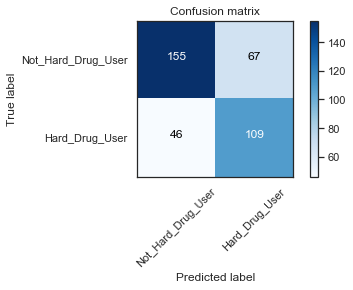

In [64]:
cm_knn=metrics.confusion_matrix(y_test,y_pred_knn)
plot_confusion_matrix(cm_knn)

### Decision Tree

In [65]:
tree = DecisionTreeClassifier(max_depth=10, class_weight='balanced')
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_test)
tree_f1 = metrics.f1_score(tree_pred, y_test)
tree_acc = metrics.accuracy_score(tree_pred, y_test)
print('Test F1 score: ', tree_f1)
print('Test Accuracy score: ', tree_acc)

Test F1 score:  0.5660377358490566
Test Accuracy score:  0.6339522546419099


Confusion Matrix, without normalization
[[149  73]
 [ 65  90]]


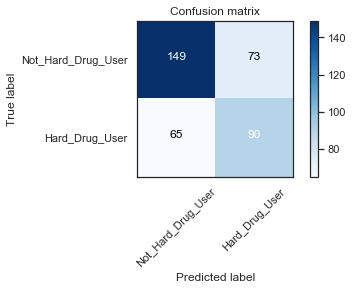

In [66]:
cm_dt=metrics.confusion_matrix(y_test,tree_pred)
plot_confusion_matrix(cm_dt)

### Random Forest

In [67]:
forest = RandomForestClassifier(class_weight = 'balanced', random_state=42, n_jobs=-1, n_estimators = 100)
forest.fit(X_train, y_train)
forest_preds = forest.predict(X_test)
forest_f1 = metrics.f1_score(y_test, forest_preds)
forest_acc = metrics.accuracy_score(y_test, forest_preds)
print('Test F1 score: ', forest_f1)
print('Test Accuracy score: ', forest_acc)

Test F1 score:  0.6646153846153846
Test Accuracy score:  0.7108753315649867


Confusion Matrix, without normalization
[[160  62]
 [ 47 108]]


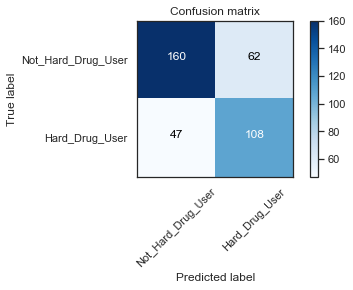

In [68]:
cm_rf=metrics.confusion_matrix(y_test,forest_preds)
plot_confusion_matrix(cm_rf)

### GridCV - RF

In [69]:
forest_params = { 
    'n_estimators': [350, 400, 450],
    'max_features': [.15, .25, .35],
    'max_depth' : [3, 5, 7],
    'criterion' : ['entropy']   
}

In [70]:
blank_forest = RandomForestClassifier(random_state = 1, class_weight='balanced')
forest_grid = GridSearchCV(estimator=blank_forest, param_grid=forest_params, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
forest_grid.fit(X_train, y_train)
print(forest_grid.best_params_)
print(forest_grid.best_estimator_)
print(forest_grid.best_score_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    9.1s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:   28.5s finished


{'criterion': 'entropy', 'max_depth': 7, 'max_features': 0.35, 'n_estimators': 450}
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=7, max_features=0.35,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=450,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)
0.7087711130987415


In [71]:
best_forest = forest_grid.best_estimator_
bf_preds = best_forest.predict(X_test)
bf_f1 = metrics.f1_score(y_test, bf_preds)
bf_acc = metrics.accuracy_score(y_test, bf_preds)
print('Test F1 score: ', bf_f1)
print('Test Accuracy score: ', bf_acc)

Test F1 score:  0.6801152737752161
Test Accuracy score:  0.7055702917771883


Confusion Matrix, without normalization
[[148  74]
 [ 37 118]]


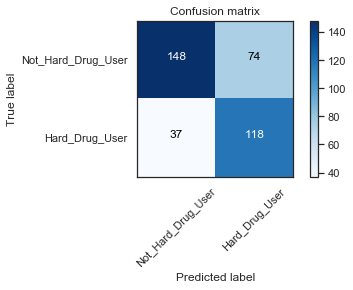

In [72]:
cm_rf_cv=metrics.confusion_matrix(y_test,bf_preds)
plot_confusion_matrix(cm_rf_cv)

## GridCV - LogisticRegression

In [73]:
#Creating Dictionary of Parameters to Tune
logistic_param = { 
    'C':[0.001,0.01,0.1,1],
    'penalty':['l1', 'l2']
}

In [74]:
lr_CV = LogisticRegression(random_state = 1, class_weight='balanced')

In [75]:
#Creating Grid Search Object and Fitting to Data
lr_CV = GridSearchCV(estimator=lr_CV, param_grid=logistic_param, cv= 5, scoring='f1', verbose=1, n_jobs=-1)
lr_CV.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=1, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=1)

In [76]:
#Identifying Best Parameters 
print(lr_CV.best_params_)
print(lr_CV.best_estimator_)
#Identifying Best Score During Fitting with Cross-Validation
print(lr_CV.best_score_)

{'C': 0.1, 'penalty': 'l2'}
LogisticRegression(C=0.1, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
0.6909669851817328


In [77]:
#Predicting Test Set
test_preds_lr_CV = lr_CV.best_estimator_.predict(X_test)
#Checking Accuracy and F1 scores
print("F1:",metrics.f1_score(y_test, test_preds_lr_CV))
print("Accuracy:",metrics.accuracy_score(y_test, test_preds_lr_CV))

F1: 0.7023809523809524
Accuracy: 0.7347480106100795


Confusion Matrix, without normalization
[[159  63]
 [ 37 118]]


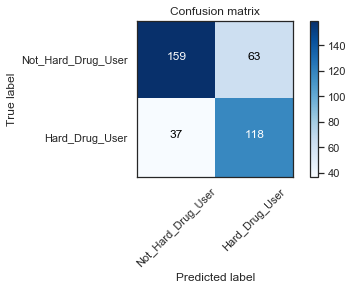

In [78]:
cm_lr_cv=metrics.confusion_matrix(y_test,test_preds_lr_CV)
plot_confusion_matrix(cm_lr_cv)

## XGBoost

In [79]:
import xgboost as xgb

In [80]:
xgb.XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [81]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)
training_preds_xgb = clf_xgb.predict(X_train)
val_preds_xgb = clf_xgb.predict(X_test)
training_accuracy_xgb = accuracy_score(y_train, training_preds_xgb)
val_accuracy_xgb = accuracy_score(y_test, val_preds_xgb)
xgb_f1 = metrics.f1_score(val_preds_xgb, y_test)

print("Training Accuracy: {:.4}%".format(training_accuracy_xgb * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_xgb * 100))
print("F1 Score: {:.4}%".format(xgb_f1 * 100))

Training Accuracy: 78.78%
Validation Accuracy: 68.7%
F1 Score: 63.58%


Confusion Matrix, without normalization
[[156  66]
 [ 52 103]]


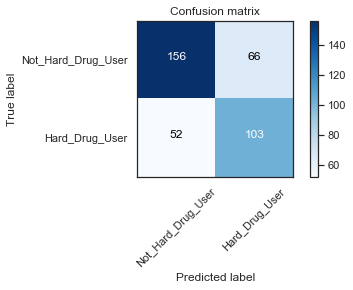

In [82]:
cm_xgb=metrics.confusion_matrix(y_test,val_preds_xgb)
plot_confusion_matrix(cm_xgb)

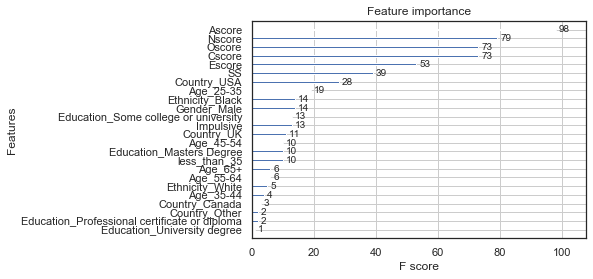

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline

xgb.plot_importance(clf_xgb)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

## Tunning XGBoost

In [84]:
param_grid_xgb = {
    "learning_rate": [0.01, 0.1, 0.5],
    'max_depth': [5, 7, 9],
    'min_child_weight': [10, 12, 14],
    'subsample': [0.2, 0,5, 0.9],
    'n_estimators': [4, 6, 8],
}

In [85]:
grid_clf_xgb = GridSearchCV(clf_xgb, param_grid_xgb, scoring='f1', cv=None, n_jobs=-1)
grid_clf_xgb.fit(features, target)

best_parameters = grid_clf_xgb.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))

training_preds_xgb_cv = grid_clf_xgb.predict(X_train)
val_preds_xgb_cv = grid_clf_xgb.predict(X_test)
training_accuracy_xgb_cv = accuracy_score(y_train, training_preds_xgb_cv)
val_accuracy_xgb_cv = accuracy_score(y_test, val_preds_xgb_cv)
f1_xgb_cv = metrics.f1_score(y_test, val_preds_xgb_cv)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy_xgb_cv * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_xgb_cv * 100))
print("F1 Score: {:.4}%".format(f1_xgb_cv * 100))
print("")
print('Test F1 score: ', f1_xgb_cv)
print('Test Accuracy score: ', val_accuracy_xgb_cv)

Grid Search found the following optimal parameters: 
learning_rate: 0.01
max_depth: 7
min_child_weight: 12
n_estimators: 6
subsample: 0.9

Training Accuracy: 64.19%
Validation Accuracy: 63.66%
F1 Score: 65.49%

Test F1 score:  0.6549118387909321
Test Accuracy score:  0.636604774535809


Confusion Matrix, without normalization
[[110 112]
 [ 25 130]]


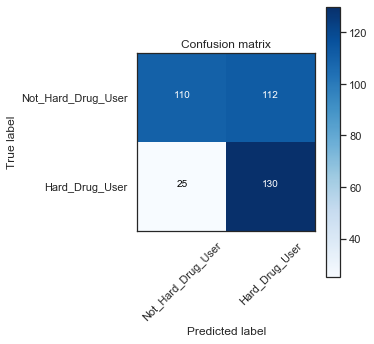

In [86]:
cm_xgb_cv=metrics.confusion_matrix(y_test,val_preds_xgb_cv)
plot_confusion_matrix(cm_xgb_cv)

# ADABoost

In [87]:
from sklearn.ensemble import AdaBoostClassifier

In [88]:
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    algorithm='SAMME.R', learning_rate=0.5, random_state=42)
ada_clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [89]:
training_preds_ada = ada_clf.predict(X_train)
val_preds_ada = ada_clf.predict(X_test)
training_accuracy_ada = accuracy_score(y_train, training_preds_ada)
val_accuracy_ada = accuracy_score(y_test, val_preds_ada)
f1_ada = metrics.f1_score(y_test, val_preds_ada)

print("Training Accuracy: {:.4}%".format(training_accuracy_ada * 100))
print("Validation Accuracy: {:.4}%".format(val_accuracy_ada * 100))
print("")
print('Test F1 score: ', f1_ada)
print('Test Accuracy score: ', val_accuracy_ada)

Training Accuracy: 74.67%
Validation Accuracy: 70.82%

Test F1 score:  0.6451612903225806
Test Accuracy score:  0.7082228116710876


Confusion Matrix, without normalization
[[167  55]
 [ 55 100]]


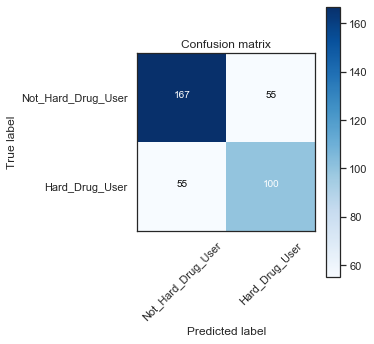

In [90]:
cm_ada=metrics.confusion_matrix(y_test,val_preds_ada)
plot_confusion_matrix(cm_ada)

## VotingClassifier

In [91]:
from sklearn.ensemble import VotingClassifier

In [112]:
voting_clf = VotingClassifier(
                estimators=[('logreg', logreg), ('knneighbors', knn), ('decisiontree', tree), 
                            ('randomforestCV', forest_grid), ('adaboost', ada_clf)], 
                voting='hard',
                weights=[3,1,1,1,2],
                n_jobs=-1)
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
vc_f1 = metrics.f1_score(y_test, vc_preds)
vc_acc = metrics.accuracy_score(y_test, vc_preds)
print('Test F1 score: ', vc_f1)
print('Test Accuracy score: ', vc_acc)

Test F1 score:  0.6811145510835913
Test Accuracy score:  0.726790450928382


Confusion Matrix, without normalization
[[162  60]
 [ 43 112]]


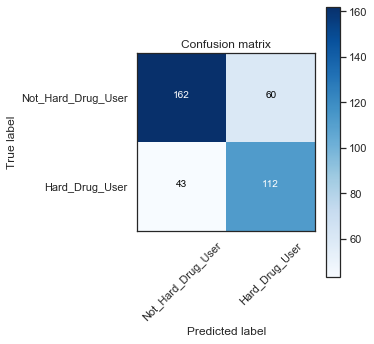

In [107]:
cm_vc=metrics.confusion_matrix(y_test,vc_preds)
plot_confusion_matrix(cm_vc)